Straight copy of log_FE

In [29]:
import sys
import numpy as np
import pandas as pd

## Load DMS and store object

In [30]:
sys.path.append('../')

from data_prep import dm_saver, data_manager

dms = dm_saver.DM_Saver.load('../dms')

dml = data_manager.Data_Manager()

dml.dms2dm(dms)

## Locating constant pvm y-intervals
Dataset B and C has 'holes' in y_train, where pv_measurement is constant. Therefore we don't want to train on this data and can remove the corresponding rows for both X and Y

In [31]:
y_hole_length = 200
from helpers import find_const_interval

In [32]:
# TAKES NO TIME TO RUN
y_train_a_const_idx, ca = find_const_interval(dml.train_a, 'pv_measurement', y_hole_length)
print('y_train_a anomalies:',ca)
y_train_b_const_idx, cb = find_const_interval(dml.train_b, 'pv_measurement', y_hole_length)
print('y_train_b anomalies:',cb)
y_train_c_const_idx, cc = find_const_interval(dml.train_c, 'pv_measurement', y_hole_length)
print('y_train_c anomalies:',cc)

const_idx = (y_train_a_const_idx, y_train_b_const_idx, y_train_c_const_idx)
%store const_idx
y_train_b_const_idx


y_train_a anomalies: 2
y_train_b anomalies: 17
y_train_c anomalies: 15
Stored 'const_idx' (tuple)


[10967,
 10968,
 10969,
 10970,
 10971,
 10972,
 10973,
 10974,
 10975,
 10976,
 10977,
 10978,
 10979,
 10980,
 10981,
 10982,
 10983,
 10984,
 10985,
 10986,
 10987,
 10988,
 10989,
 10990,
 10991,
 10992,
 10993,
 10994,
 10995,
 10996,
 10997,
 10998,
 10999,
 11000,
 11001,
 11002,
 11003,
 11004,
 11005,
 11006,
 11007,
 11008,
 11009,
 11010,
 11011,
 11012,
 11013,
 11014,
 11015,
 11016,
 11017,
 11018,
 11019,
 11020,
 11021,
 11022,
 11023,
 11024,
 11025,
 11026,
 11027,
 11028,
 11029,
 11030,
 11031,
 11032,
 11033,
 11034,
 11035,
 11036,
 11037,
 11038,
 11039,
 11040,
 11041,
 11042,
 11043,
 11044,
 11045,
 11046,
 11047,
 11048,
 11049,
 11050,
 11051,
 11052,
 11053,
 11054,
 11055,
 11056,
 11057,
 11058,
 11059,
 11060,
 11061,
 11062,
 11063,
 11064,
 11065,
 11066,
 11067,
 11068,
 11069,
 11070,
 11071,
 11072,
 11073,
 11074,
 11075,
 11076,
 11077,
 11078,
 11079,
 11080,
 11081,
 11082,
 11083,
 11084,
 11085,
 11086,
 11087,
 11088,
 11089,
 11090,
 11091,


### Deleting the rows where pvm is const

In [33]:
train_a = dml.train_a
train_b = dml.train_b
train_c = dml.train_c

In [34]:
date_forecast_a_const = dml.train_a.iloc[y_train_a_const_idx]['date_forecast']
date_forecast_a_const_values = date_forecast_a_const.values
train_a = train_a[~train_a['date_forecast'].isin(date_forecast_a_const_values)]

date_forecast_b_const = dml.train_b.iloc[y_train_b_const_idx]['date_forecast']
date_forecast_b_const_values = date_forecast_b_const.values
train_b = train_b[~train_b['date_forecast'].isin(date_forecast_b_const_values)]

date_forecast_c_const = dml.train_c.iloc[y_train_c_const_idx]['date_forecast']
date_forecast_c_const_values = date_forecast_c_const.values
train_c = train_c[~train_c['date_forecast'].isin(date_forecast_c_const_values)]


In [35]:
# By running this block, the dm train_a etc. will consist of combined x and y obs and est data

dml.train_a = train_a
dml.train_b = train_b
dml.train_c = train_c

## Normalizing the train data and saving the amplitude

In [36]:
pv_a = dml.train_a['pv_measurement']
pv_b = dml.train_b['pv_measurement']
pv_c = dml.train_c['pv_measurement']

print('A:\n',pv_a.describe())
print('B:\n',pv_b.describe())
print('C:\n',pv_c.describe())

A:
 count    34083.000000
mean       630.631711
std       1165.926622
min          0.000000
25%          0.000000
50%          5.940000
75%        678.150000
max       5733.420000
Name: pv_measurement, dtype: float64
B:
 count    29132.000000
mean        99.522841
std        203.946382
min         -0.000000
25%         -0.000000
50%          0.000000
75%         83.662500
max       1152.300000
Name: pv_measurement, dtype: float64
C:
 count    23214.000000
mean        87.265551
std        173.398144
min         -0.000000
25%          0.000000
50%          0.000000
75%         88.200000
max        999.600000
Name: pv_measurement, dtype: float64


### Mean value

In [37]:
dml.amplitude = np.array([pv_a.mean(), pv_b.mean(),pv_c.mean()])
dml.amplitude

array([630.63171053,  99.52284101,  87.26555096])

In [38]:
%store dml

Stored 'dml' (Data_Manager)


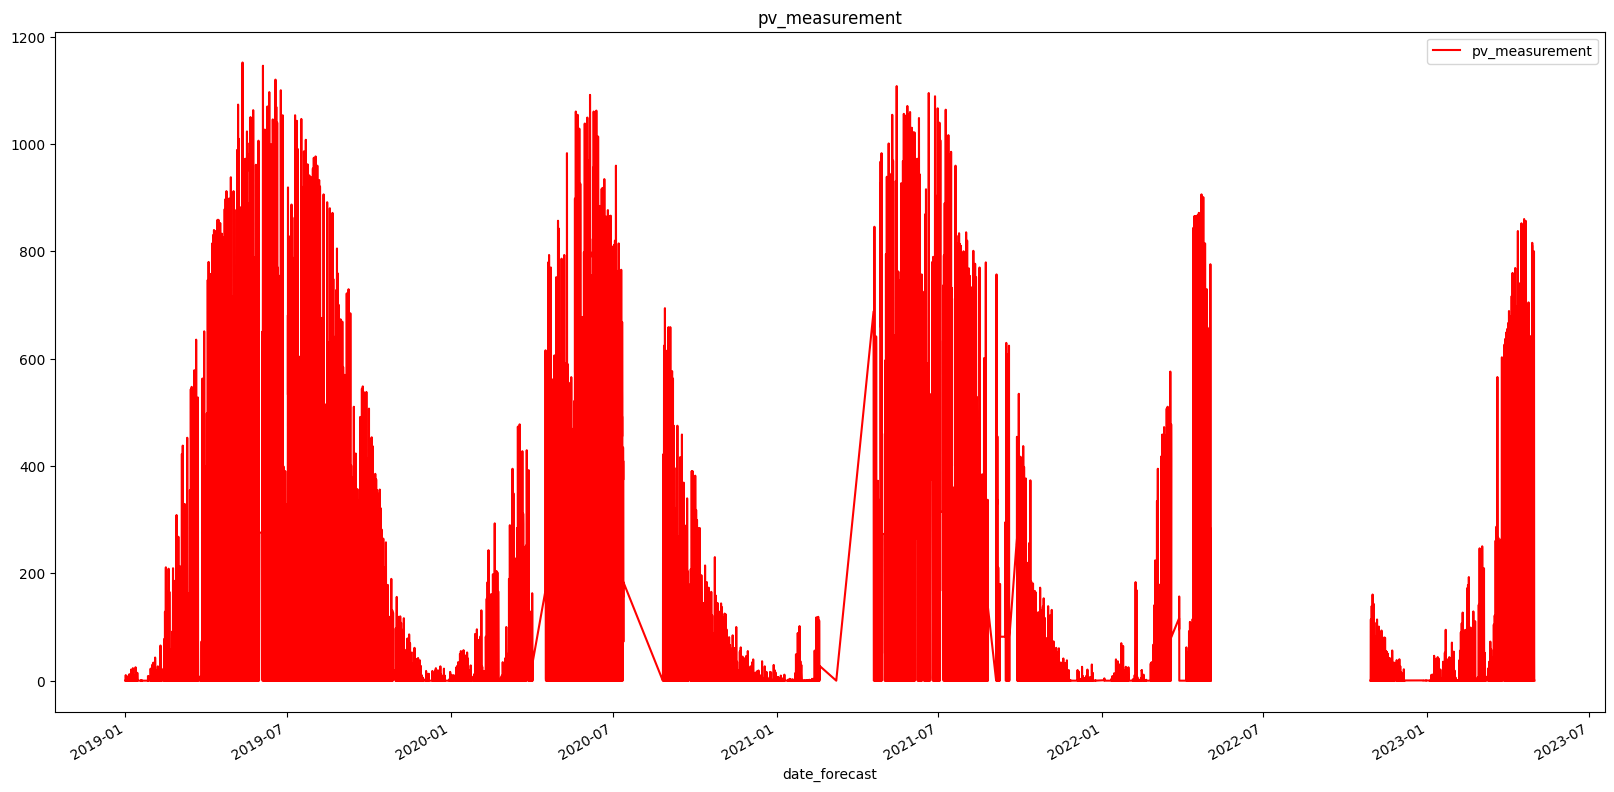

In [39]:
dml.plot_feature(dml.train_b, 'pv_measurement')